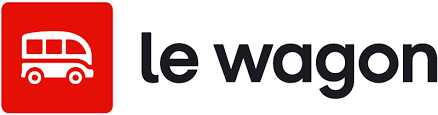

#The dataset 🏀

The dataset contains statistics of **4000** NBA players, including:

- `season`: The season (yearly) the player played in
- `poss`: Possessions played
- `mp`: Minutes played
- `do_ratio`: A player’s ratio of time spent in defense vs. offense; negative values mean more defense positioning
- `pacing`: Player impact on team possessions per 48 minutes
- `win_rating`: Wins Above Replacement rating, how many additional wins a player is worth over a same-level replacement

# Predicting Win Ratings in the NBA

You're finally ready to try out **your first ML model**! 🔥


Your first regression task of this week is to **predict** the Win Rating of NBA players based on their characteristics.


Why is this a regression task?



<details>
    <summary>Answer 💡</summary>
    
Because the Win rating is a continuous feature, as it's on a scale!
</details>


## Import the data




The dataset is available at this link: [https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/NBA.csv](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/NBA.csv).


Load it into a `df`variable.


<details>
    <summary>Tips 💯</summary>
    
You can download the file and upload it to Google Colab, or you can directly but the download link inside the `pd.read_csv()` function!
    
</details>


In [38]:
import pandas as pd
file_path = r'C:\Users\dell\Desktop\NBA.csv'
df= pd.read_csv(file_path)
print(df.head())


   season  poss    mp  do_ratio    pacing  win_rating
0    1987  4847  2409 -1.546275 -0.599918    1.643091
1    2017  5582  2708  0.996587  0.531888   10.808427
2    2016  4976  2407  0.242598  0.127976    3.054773
3    2021  1178   585 -1.343806 -1.201034    0.230004
4    1988  4534  2056 -1.813990 -0.128997    0.905614


Do you see the **features and target**?

> **Your answer here (Double Click)**
--not, i can't recognise any features and target only from such format data


## Simple modelling


### Define X and y


We first need to define our features (X) and our target (y).


Let's start off with a simple example - let `X` be **the number of minutes** a player has played.

You can figure out what `y` should be from the task we are trying to achieve!


In [43]:
X = df[['mp']]
y =df['win_rating']
# print(X.head())
# print("--------")
# print(y.head())

### Train test split


Another critical step Machine Learning is the **train, test, split**. \
This is especially important to avoid [data leakage](https://datascientest.com/en/data-leakage-definition-and-prevention).

Use Sklearn `train_test_split`function to create **4 variables** `X_train`, `X_test`, `y_train`, `y_test`. \
Have a look at the lecture if you are unsure about the syntax.




- Use `random_state=0` to compare your final results with your buddy's results.




In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
# print("Training feature shape",X_train.shape)
# print("Testing feature shape",X_test.shape)


### Scaling the features



We need to scale our numerical feature.

Import and instantiate a scaler of your choice from the **Sklearn** library. Then :

1. Fit and transform `X_train` and load the results in a `X_train_scaled`variable
2. Transform `X_test` and load the results in a `X_test_scaled` variable


⚠️  **IMPORTANT!  NEVER** fit the test dataset.


In [47]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)
# print("Scaler train:\n",X_train_scaled[:5])
print("Scaler X test:\n",X_test_scaled[:5])

Scaler X test:
 [[-0.31892301]
 [ 1.67541223]
 [ 1.28213491]
 [ 0.36082789]
 [ 0.57443536]]


### Modelling


Here come the exciting part!


**Linear Regression** is the fundamental regression model in Machine Learning!

For now, you don't need to understand the specifics of how it works, just know that it can do regression tasks very easily!

Import, instantiate and fit a **LinearRegression** model on the training data!

In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled,y_train)
print("Model coefficients:",model.coef_)
print("Model intercept:",model.intercept_)

Model coefficients: [2.58965978]
Model intercept: 2.041936225790625


### Scoring

Let's evaluate the performance of our model. \
Score your fitted model on your **test dataset** and store the result in a variable named `single_score`.



You should obtain a score around 54%.


In [51]:
single_score = model.score(X_test_scaled,y_test)
print("model performance:",single_score)

model performance: 0.5509456884680894


How can we interpret the score?

For now, bigger is better (the scale goes up to 1). We'll understand more in depth how to make sense of this when we study Linear Regressions in detail.


## A more complete features set

It's time to try the **Linear Regression** on all of the relevant features.

Create new `X` and `y` variables, using `poss`,`mp`,`do_ratio`and `pacing`as features this time.


In [59]:
X = df[['poss','mp','do_ratio','pacing']]
y =df['win_rating']


### Train test split


Split `X` and `y` as you did before. \
Remember to set `random_state=0` to compare your results with your buddy's.


In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


### Scaling

Now it's time to scale the data, just like we did before!

In [63]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

### A new model

Because we have a new set of features, we need to train a new model!

Instantiate and train a second model on with your new features.


In [65]:
from sklearn.linear_model import LinearRegression
new_model = LinearRegression()
new_model.fit(X_train_scaled,y_train)
print("Model coefficients:",new_model.coef_)
print("Model intercept:",new_model.intercept_)

Model coefficients: [-0.77150627  2.69618374  1.15672277  0.0718331 ]
Model intercept: 2.041936225790625


Score your new fitted model, and store the results in a variable named `multiple_score`.


In [67]:
multiple_score = new_model.score(X_test_scaled,y_test)
print("model performance:",multiple_score)


model performance: 0.6446947826823121


Compare `single_score`and `multiple_score`.

In [ ]:
single_scoreand from 0.55 obviously increase to 0.64 in multiple_score

> **We can observe a substantial increase of the score when we train a model on many features instead of just one.**


## A new player arrives!

These are his stats:

- poss: 4902
- mp: 1845
- do_ratio: 1.011
- pacing: 0.381

Create a single row DataFrame for this new player!

In [75]:
import pandas as pd
new_player_data = {
    "poss":[4902],
    "mp":[1845],
    "do_ratio":[1.011],
    "pacing":[0.381]
}
new_player_df = pd.DataFrame(new_player_data)
print(new_player_df)

   poss    mp  do_ratio  pacing
0  4902  1845     1.011   0.381


Predict the win rating for this new player!


In [77]:
predicted_rating= new_model.predict(new_player_df)
print(f"predicted winning rate for the new player is:{predicted_rating[0]}")

predicted winning rate for the new player is:1195.7740110505868


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


## What is going on?

That's an astronomical win rating! Did'nt we forget to do something?

We did... can you figure out what we forgot to do and fix the issue? \
Once you have, you can go on with the prediction!

In [87]:
from sklearn.preprocessing import StandardScaler
new_player_scaled = Scaler.transform(new_player_df)

new_predicted_rating= new_model.predict(new_player_scaled)
print(f"predicted winning rate for the new player is:{predicted_rating[0]}")

predicted winning rate for the new player is:1195.7740110505868


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


**Congratulations on training your first regression model!** 🎉

